### Data analysis 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pipeline 
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('data/train.csv') 
test_df = pd.read_csv('data/test.csv')

In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


From the describe(), some outliers can be identified in some columns. I will keep these columns with outliers in mind to plot and process them in the future.          
Also some data are missing, I will have a look how drastic this is.

In [4]:
columns_with_outliers = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Encode columns different ways.

In [5]:
# Encode
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])
train_df['CryoSleep'] = label_encoder.fit_transform(train_df['CryoSleep'])
train_df['VIP'] = label_encoder.fit_transform(train_df['VIP'])
train_df['Destination'] = label_encoder.fit_transform(train_df['Destination'])
train_df['Transported'] = label_encoder.fit_transform(train_df['Transported'])

Look at the most common value, then look at the plots.

In [6]:
train_df['HomePlanet'].value_counts()

HomePlanet
0    4602
1    2131
2    1759
3     201
Name: count, dtype: int64

In [7]:
train_df['CryoSleep'].value_counts()

CryoSleep
0    5439
1    3037
2     217
Name: count, dtype: int64

In [8]:
train_df['VIP'].value_counts()

VIP
0    8291
2     203
1     199
Name: count, dtype: int64

In [9]:
train_df['Destination'].value_counts()

Destination
2    5915
0    1800
1     796
3     182
Name: count, dtype: int64

In [10]:
# Manage missing values for the categorical columns 
train_df['HomePlanet'].replace(3, 1, inplace=True)
train_df['CryoSleep'].replace(2, 0, inplace=True)
train_df['VIP'].replace(2, 0, inplace=True)
train_df['Destination'].replace(3, 2, inplace=True)

In [11]:
# One-hot encode HomePlanet column 
encoded_planets_df = pd.get_dummies(train_df['HomePlanet'], prefix='Planet')
encoded_destination_df = pd.get_dummies(train_df['Destination'], prefix='Destination')
train_df = pd.concat([train_df, encoded_destination_df, encoded_planets_df], axis = 1)

train_df['HomePlanet'].value_counts()

HomePlanet
0    4602
1    2332
2    1759
Name: count, dtype: int64

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/1693088062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HomePlanet', y='Transported', data=transport_rate, palette='viridis')


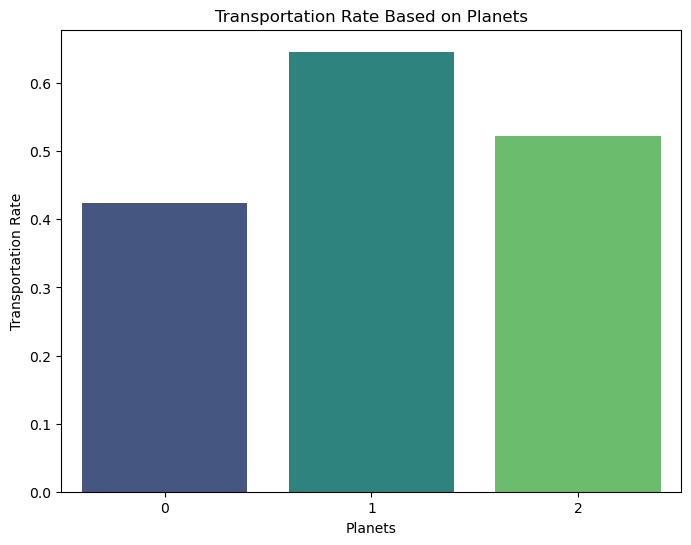

In [12]:
# Calculate the transport rate for each planet
transport_rate = train_df.groupby('HomePlanet')['Transported'].mean().reset_index()

# Plot the bar plot showing transport rate
plt.figure(figsize=(8, 6))
sns.barplot(x='HomePlanet', y='Transported', data=transport_rate, palette='viridis')
plt.title('Transportation Rate Based on Planets')
plt.xlabel('Planets')
plt.ylabel('Transportation Rate')
plt.show()

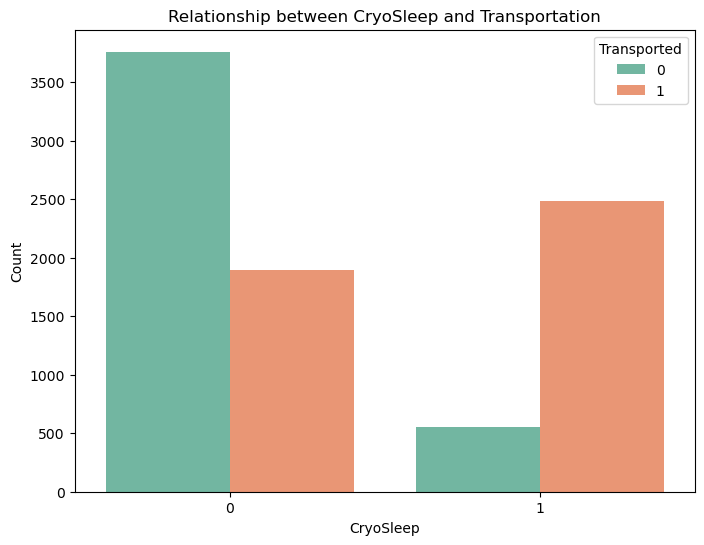

In [13]:
# Plot a count plot to show the relationship between 'CryoSleep' and 'Transported'
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=train_df, palette='Set2')
plt.title('Relationship between CryoSleep and Transportation')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

Passengers who were elected to be 
put into suspended animation had much worse thansportation rate. 

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


<Figure size 2000x1000 with 0 Axes>

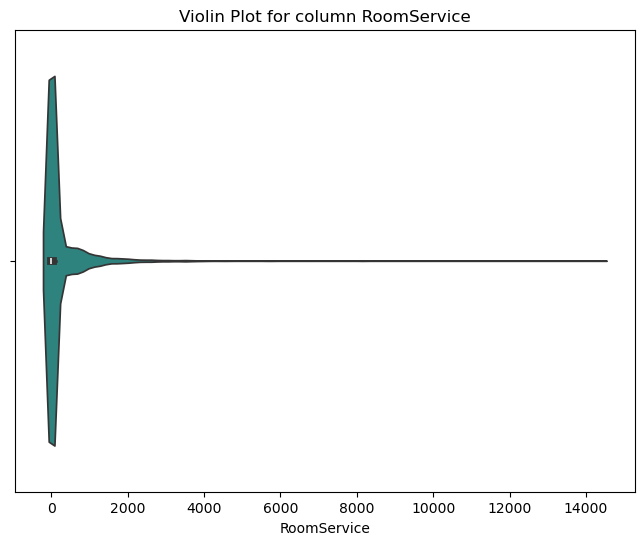

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


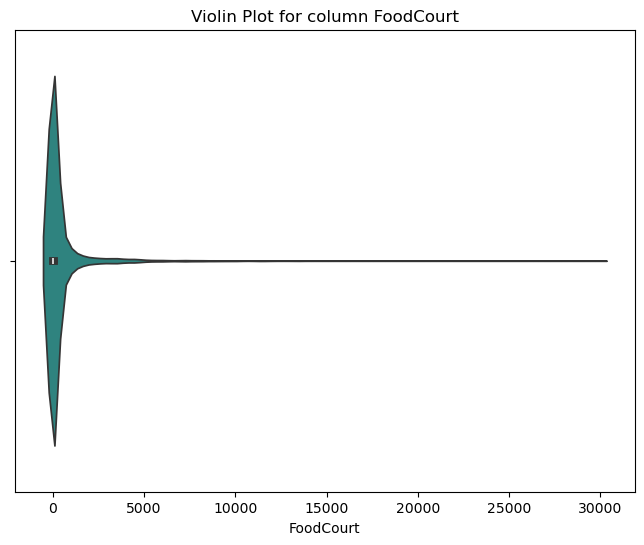

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


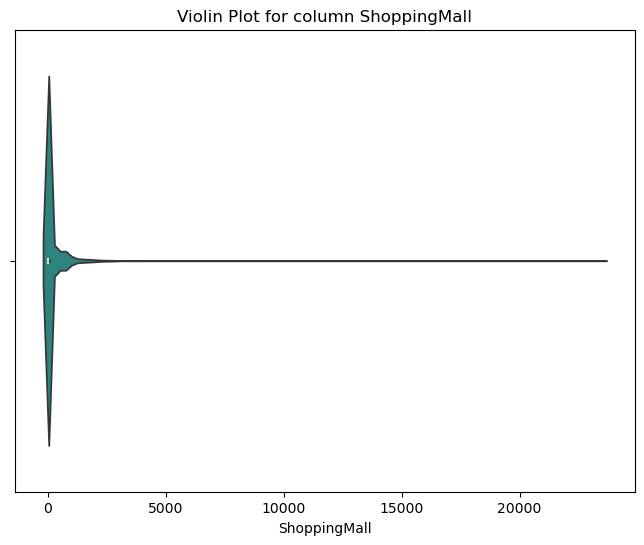

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


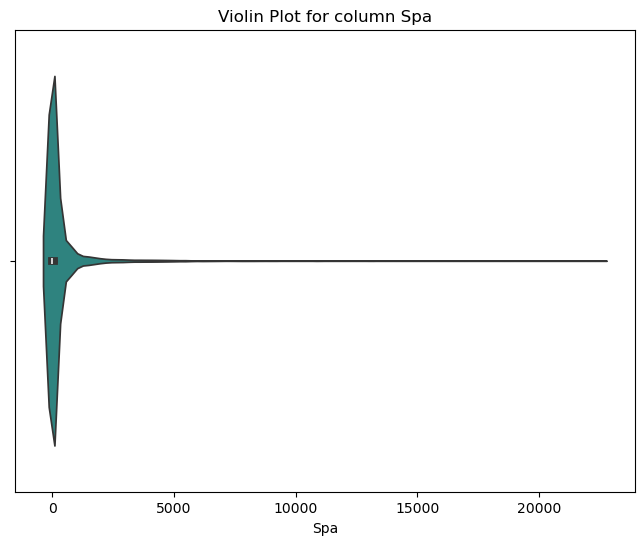

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


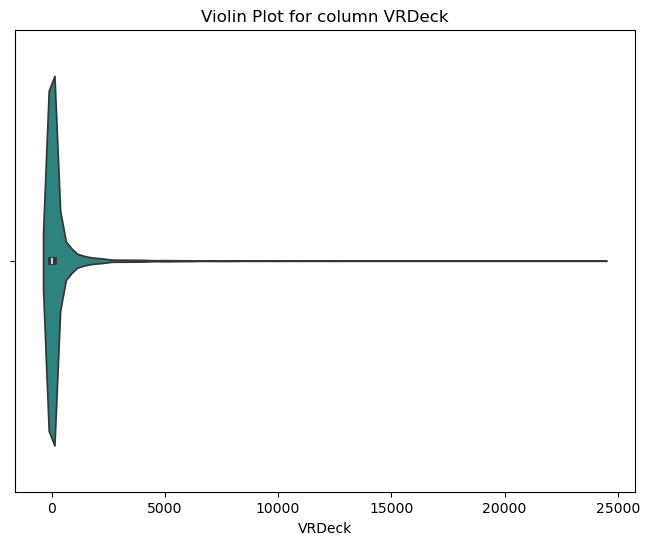

In [14]:
plt.figure(figsize = (20, 10))

for column in columns_with_outliers: 
    # Plot a violin plot to show the distribution 
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=train_df[column], legend=False, palette='viridis')
    plt.title('Violin Plot for column ' + column)
    plt.xlabel(column)
    plt.show()

### Managing outliers 

In [15]:
def manage_outilers(column, outlier_value=1000):
    # Get the mean for non-outlier values to replace 
    mean = train_df[train_df[column] < outlier_value][column].mean()
    # Get the number of outliers 
    print(train_df[train_df[column] < outlier_value][column].count())
    train_df.loc[train_df[column] > outlier_value, column] = mean

manage_outilers('RoomService', 1000)
manage_outilers('FoodCourt', 2500)
manage_outilers('ShoppingMall', 1000)
manage_outilers('Spa', 1500)
manage_outilers('VRDeck', 1500)

7911
8050
8103
8054
8074


### Filling up missing values left accept name and cabin

In [16]:
columns_with_missing = train_df.columns[train_df.isnull().any()].tolist()
columns_with_missing.remove('Name')
columns_with_missing.remove('Cabin')

print(columns_with_missing)
for column in columns_with_missing:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [17]:
train_df.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.672955,0.349362,1.494306,28.827930,0.022892,83.162711,153.001615,82.318459,104.448969,103.711296,0.503624
std,0.790476,0.476796,0.814966,14.339054,0.149568,197.326912,380.482754,199.085206,249.175403,252.135728,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,1000.000000,2492.000000,1000.000000,1497.000000,1495.000000,1.000000


### Have a look at distribution of a column with float data type 

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_1336/1060094205.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['RoomService'], kde = True, fit = scipy.stats.norm)


<Axes: xlabel='RoomService', ylabel='Density'>

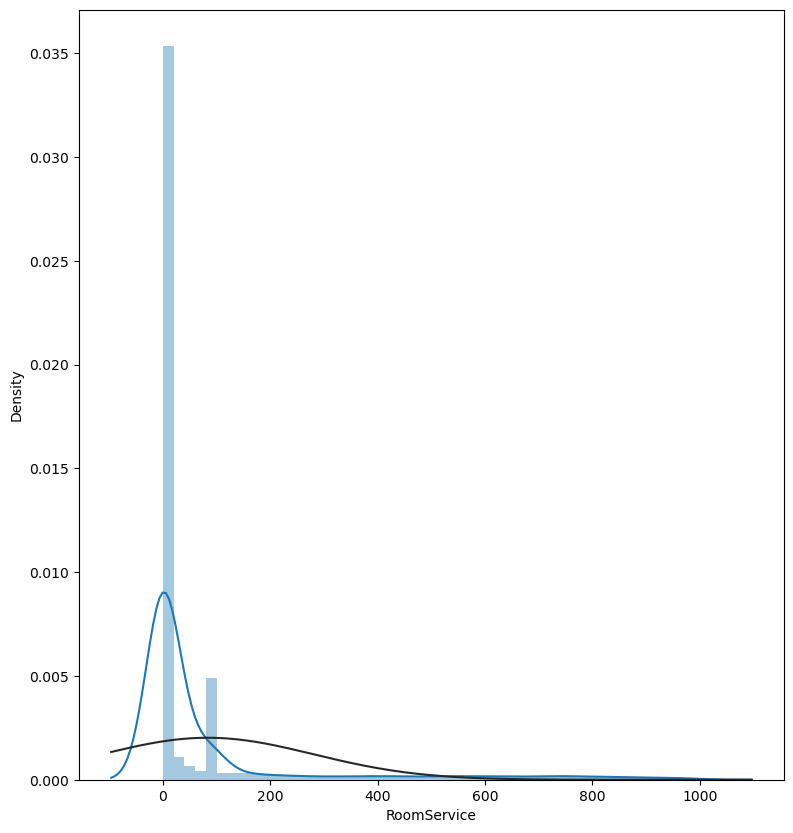

In [18]:
import scipy

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
sns.distplot(train_df['RoomService'], kde = True, fit = scipy.stats.norm)

# Analyse cabin and name 
First, select the side of the cabin that is P 
for port or S for starboard, and look at the difference between the transport rates for one side and the other. Also it is possible to have a look at deck 

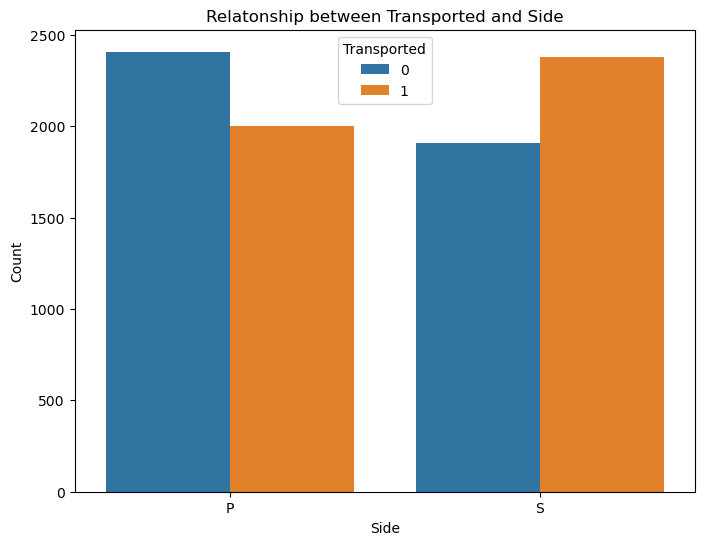

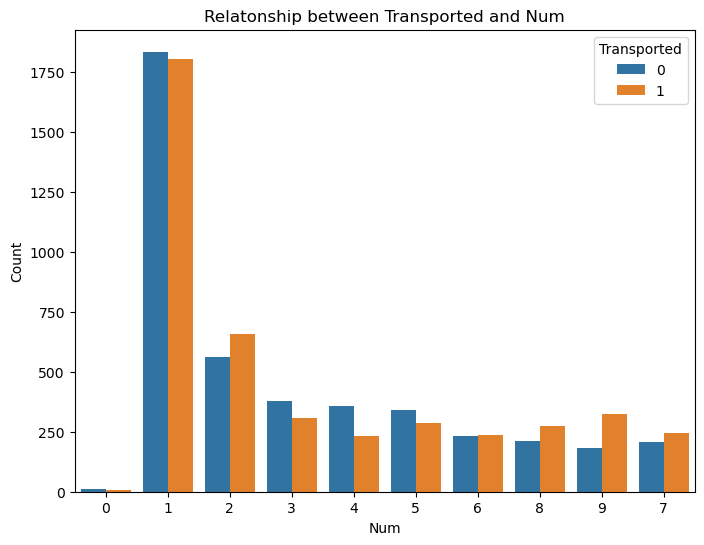

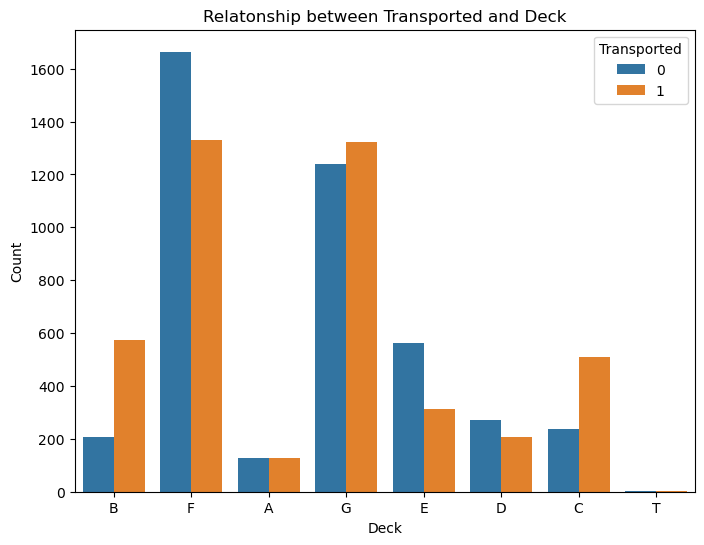

In [19]:
# Fill in with the most frequent value for simplicity 
train_df['Cabin'].fillna('F/1/P', inplace=True)

train_df['Side'] = train_df['Cabin'].str[-1]
train_df['Deck'] = train_df['Cabin'].str[0]
train_df['Num'] = train_df['Cabin'].str[2]

# train_df['Side_Deck'] = train_df['Cabin'].str[0:-1]

# Group by the 'Side' column
grouped_by_side = train_df.groupby('Side')['Cabin'].apply(list).reset_index(name='grouped')

# Group by the 'Deck' column 
grouped_by_deck = train_df.groupby('Deck')['Cabin'].apply(list).reset_index(name='grouped')

# Group by the 'Num' column 
grouped_by_num = train_df.groupby('Num')['Cabin'].apply(list).reset_index(name='grouped')

categorical_columns = ['Side', 'Num', 'Deck']

for column in categorical_columns:
    # Plot the relationship between 'Transported' and column
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='Transported', data=train_df)
    plt.title('Relatonship between Transported and ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


### Preprocessing Name column

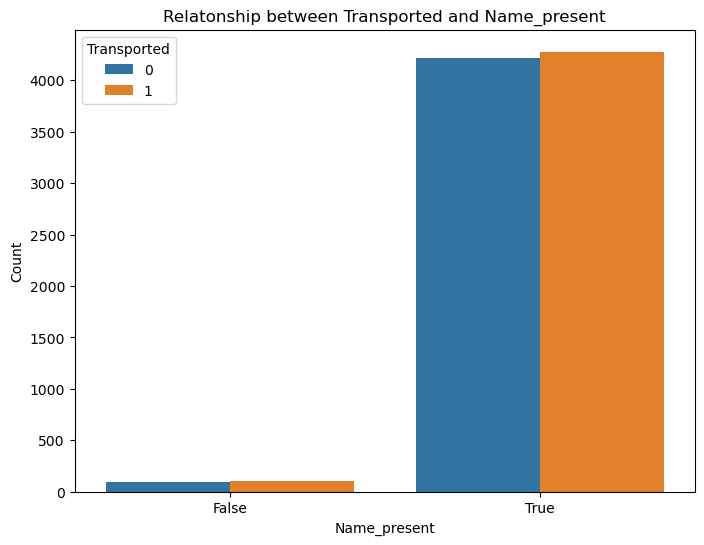

In [20]:
train_df['Name_present'] = pd.notna(train_df['Name'])
# Plot the relationship between 'Transported' and column
plt.figure(figsize=(8, 6))
sns.countplot(x='Name_present', hue='Transported', data=train_df)
plt.title('Relatonship between Transported and Name_present')
plt.xlabel('Name_present')
plt.ylabel('Count')
plt.show()

Extract information from the PassengerId column. People in the group are often family members. 

[1 2 3 4 5 6 7 8]
0          1
1          2
2          3
3          3
4          4
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: Groups, Length: 8693, dtype: int64


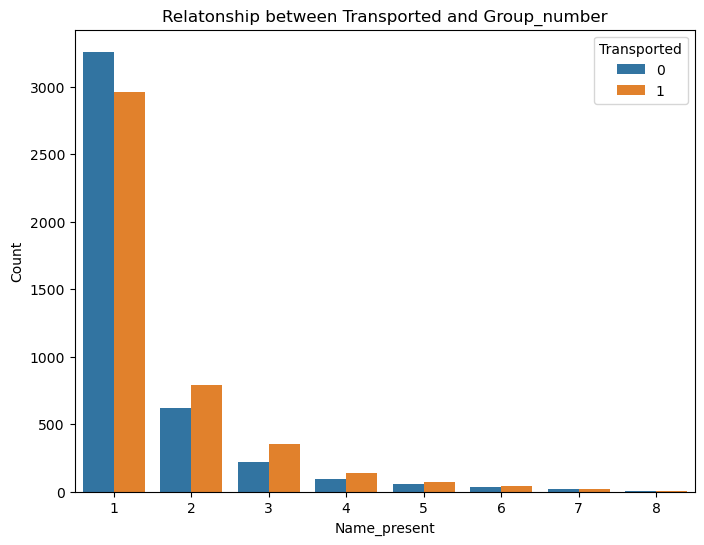

In [21]:
train_df['Deck'] = label_encoder.fit_transform(train_df['Deck'])
train_df['Groups'] = train_df['PassengerId'].str[:4].astype(int)
train_df['Group_number'] = train_df['PassengerId'].str[6:7].astype(int)
print(train_df['Group_number'].unique())

# Grouping 
grouped_df = train_df.groupby('Groups').size().reset_index(name='count')
print(train_df['Groups'])

# Displaying the result
# Plot the relationship between 'Transported' and column
plt.figure(figsize=(8, 6))
sns.countplot(x='Group_number', hue='Transported', data=train_df)
plt.title('Relatonship between Transported and Group_number')
plt.xlabel('Name_present')
plt.ylabel('Count')
plt.show()

Missing names don't affect transport rate.
It is complicated to fill up missing values for column 'Name'. However I can extract from this column family relations by examining surnames. I will drop the columns that won't be used in the future and proceed with Future engineering stage. 

# Feature engineering 
The most intuitive is to sum up all float columns, to get total cost. 

In [22]:
train_df['TotalCost'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
train_df['Is_spended'] = (train_df['TotalCost'] == 0).astype(int)
train_df['Is_S_side'] = (train_df['Side'] == 'S').astype(int)
train_df['From_to'] = train_df['HomePlanet'].astype(str) + '-' + train_df['Destination'].astype(str)
train_df['From_to'] = label_encoder.fit_transform(train_df['From_to'])

# Drop not needed columns 
train_df = train_df.drop(columns=['Name', 'Name_present', 'PassengerId', 'Destination', 'HomePlanet', 'Side', 'Cabin'])

In [23]:
train_df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_0,...,Planet_1,Planet_2,Deck,Num,Groups,Group_number,TotalCost,Is_spended,Is_S_side,From_to
CryoSleep,1.000000,-0.070736,-0.078281,-0.301926,-0.287890,-0.293428,-0.300605,-0.295275,0.460132,0.065589,...,0.093281,0.032715,0.018806,0.022323,-0.006883,0.063291,-0.593024,0.775920,0.016861,0.049018
Age,-0.070736,1.000000,0.091574,0.069684,0.131349,0.059077,0.098722,0.092765,-0.074249,0.016709,...,0.210998,0.016081,-0.241692,-0.036674,-0.009346,-0.131425,0.194289,-0.208542,0.010749,0.123677
VIP,-0.078281,0.091574,1.000000,0.022687,0.075021,0.017145,0.055107,0.051136,-0.037261,0.045167,...,0.143425,0.043523,-0.178205,-0.006590,0.013608,0.000703,0.099223,-0.080027,-0.011017,0.102117
RoomService,-0.301926,0.069684,0.022687,1.000000,-0.023565,0.120640,0.021258,-0.019161,-0.249768,-0.067405,...,-0.171223,0.170523,0.077630,-0.013693,0.000571,-0.072809,0.334908,-0.325439,-0.029814,0.097474
FoodCourt,-0.287890,0.131349,0.075021,-0.023565,1.000000,-0.030717,0.118020,0.131324,-0.077043,0.044690,...,0.208406,-0.137514,-0.196986,-0.011036,0.003213,-0.000653,0.680119,-0.310519,0.011399,-0.029403
ShoppingMall,-0.293428,0.059077,0.017145,0.120640,-0.030717,1.000000,-0.003536,-0.020303,-0.094989,-0.065450,...,-0.154055,0.099693,0.073345,-0.008087,0.005444,-0.068879,0.322885,-0.319290,-0.008208,0.036833
Spa,-0.300605,0.098722,0.055107,0.021258,0.118020,-0.003536,1.000000,0.065596,-0.238233,-0.006721,...,0.054775,-0.057436,-0.080958,-0.006128,0.007206,-0.028804,0.494248,-0.323688,-0.000842,-0.018875
VRDeck,-0.295275,0.092765,0.051136,-0.019161,0.131324,-0.020303,0.065596,1.000000,-0.213403,0.012855,...,0.089851,-0.126354,-0.091424,-0.010520,-0.007516,-0.037628,0.488763,-0.317628,-0.015472,-0.075500
Transported,0.460132,-0.074249,-0.037261,-0.249768,-0.077043,-0.094989,-0.238233,-0.213403,1.000000,0.108722,...,0.172692,0.019544,-0.114941,0.045856,0.021491,0.066390,-0.331500,0.432689,0.101455,0.074292
Destination_0,0.065589,0.016709,0.045167,-0.067405,0.044690,-0.065450,-0.006721,0.012855,0.108722,1.000000,...,0.278177,-0.120996,-0.254487,-0.006185,-0.001458,0.050093,-0.012212,0.053797,0.010285,-0.270167


# Model training 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pipeline

# Define features and target variable
features = ['CryoSleep', 'Age', 'VIP',
       'Destination_0', 'Destination_1', 'Destination_2',
       'Planet_0', 'Planet_1', 'Planet_2', 'Deck', 'Num', 'Groups',
       'Group_number', 'TotalCost', 'Is_spended', 'Is_S_side', 'From_to', 
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']
target = 'Transported'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_df[features],
    train_df[target],
    test_size=0.2,
    random_state=42
)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define hyperparameters and their potential values for Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 9, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt', 'log']
}

# Use Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_random_forest_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_random_forest_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy with Best Model: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


### Use calibration 

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

# Calibrate the Random Forest model using CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(best_random_forest_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = calibrated_model.predict_proba(X_test)

# Evaluate the calibrated model
accuracy = accuracy_score(y_test, calibrated_model.predict(X_test))
log_loss_value = log_loss(y_test, y_pred_proba)

print(f"Accuracy of Calibrated Model: {accuracy:.4f}")
print(f"Log Loss of Calibrated Model: {log_loss_value:.4f}")

Accuracy of Calibrated Model: 0.7844
Log Loss of Calibrated Model: 0.4643


In [ ]:
processed_df = pipeline.preprocessing(test_df)
ready_df = pipeline.feature_engineering(processed_df)

y_pred = calibrated_model.predict(ready_df[features]).astype(bool)

submission_df = pd.DataFrame({"PassengerId" : test_df['PassengerId'], 'Transported' : y_pred})

submission_df.to_csv('submission.csv', index=False)

KeyError: "['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService'] not in index"